## Advanced Regression Assignment

In [3414]:
# Importing libraries
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',10000)

In [3415]:
# Importing dataframe for analysis
surprise_housing=pd.read_csv('train.csv')

In [3416]:
# Observing data with top 5 rows of the dataset.
surprise_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3417]:
# Listing columns in the dataset.
surprise_housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3418]:
# Checking the shape of the dataset.
surprise_housing.shape

(1460, 81)

In [3419]:
# Seeing the basic information about the dataframe.
surprise_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3420]:
# Running the basic describe on the data and verifying the data.
surprise_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


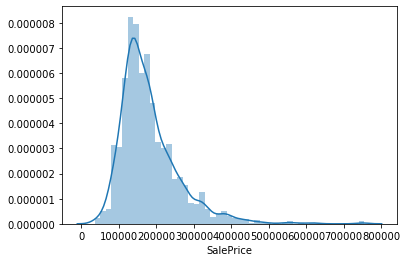

In [3421]:
# Checking the normalisation o the dependent variable in the dataset
sns.distplot(surprise_housing['SalePrice'])
plt.show()

In [3422]:
# Finding the skewness of dependent variable
print('Skewness:',surprise_housing['SalePrice'].skew(),'Mean:',surprise_housing['SalePrice'].mean())

Skewness: 1.8828757597682129 Mean: 180921.19589041095


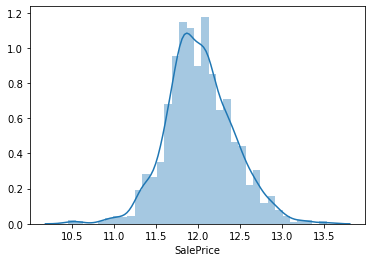

In [3423]:
# Dependent variable is not completely in normalised form therefore applying log transformation over it and plotting the graph.
surprise_housing['SalePrice']=np.log(surprise_housing['SalePrice'])
sns.distplot(surprise_housing['SalePrice'])
plt.show()

In [3424]:
# Finding the skewness of dependent variable after performin log transformation
print('Skewness:',surprise_housing['SalePrice'].skew(),'Mean:',surprise_housing['SalePrice'].mean())

Skewness: 0.12133506220520406 Mean: 12.024050901109373


In [3425]:
# Percentage of the null values in the dataset.
surprise_housing.isnull().sum()*100/surprise_housing.shape[0] 

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [3426]:
# Percentage of the null values which are greater than 50% in the dataset.
surprise_housing.columns[surprise_housing.isnull().sum()*100/surprise_housing.shape[0]>50]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [3427]:
surprise_housing['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [3428]:
surprise_housing['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

In [3429]:
surprise_housing['Fence'].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [3430]:
surprise_housing['MiscFeature'].value_counts(dropna=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [3431]:
# Listing columns having null percentage
surprise_housing.columns[surprise_housing.isnull().sum()*100/surprise_housing.shape[0]>0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [3432]:
# Finally checking the null values in the dataset 
surprise_housing.columns[surprise_housing.isnull().sum()*100/surprise_housing.shape[0]>0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [3433]:
# Imputing the columns having null values with mode or mean.
surprise_housing['MasVnrType'].fillna(surprise_housing['MasVnrType'].mode()[0],inplace=True)
surprise_housing['Electrical'].fillna(surprise_housing['Electrical'].mode()[0],inplace=True)
surprise_housing['LotFrontage'].fillna(surprise_housing['LotFrontage'].mean(),inplace=True)
surprise_housing['MasVnrArea'].fillna(surprise_housing['MasVnrArea'].mean(),inplace=True)
surprise_housing['GarageYrBlt'].fillna(surprise_housing['GarageYrBlt'].mean(),inplace=True)

In [3434]:
# Storing all the columns having datatype 'object' in a separate dataframe i.e object_data
object_data=surprise_housing.select_dtypes(['object'])
# Listing columns in object_data dataframe
print(object_data.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [3435]:
# # Running for loop to see the value counts of values in the categorical columns.
for i in object_data.columns:
    print("-----------%s-----------" % i)
    print(object_data[i].value_counts(dropna=False))

-----------MSZoning-----------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-----------Street-----------
Pave    1454
Grvl       6
Name: Street, dtype: int64
-----------Alley-----------
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
-----------LotShape-----------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-----------LandContour-----------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
-----------Utilities-----------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
-----------LotConfig-----------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-----------LandSlope-----------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
-----------Neighborhood-----------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt   

In [3436]:
# Replacing the categorical value with numerical value for analysis
surprise_housing['CentralAir']=surprise_housing['CentralAir'].map({'N':0,'Y':1 })
surprise_housing['Street']=surprise_housing['Street'].map({'Pave':0,'Grvl':1 })
surprise_housing['Utilities']=surprise_housing['Utilities'].map({'AllPub':0,'NoSeWa':1 })
# Replacing columns having Ordinal(Ordered) values with numeric values.
surprise_housing['Alley'].fillna('no_alley',inplace=True)
surprise_housing['PoolQC'].fillna('no_pool',inplace=True)
surprise_housing['Fence'].fillna('no_fence',inplace=True)
surprise_housing['MiscFeature'].fillna('no_miscfeatures',inplace=True)
surprise_housing['GarageType'].fillna('no_garage_type',inplace=True)
surprise_housing['GarageQual'].fillna('no_garage',inplace=True)
surprise_housing['BsmtQual'].fillna('nobasmntqual',inplace=True)
surprise_housing['BsmtCond'].fillna('nobsmntcond',inplace=True)
surprise_housing['BsmtExposure'].fillna('nobsmntexp',inplace=True)
surprise_housing['BsmtFinType1'].fillna('nobsmnttyp1',inplace=True)
surprise_housing['BsmtFinType2'].fillna('nobsmnttyp2',inplace=True)
surprise_housing['FireplaceQu'].fillna('nofireplace',inplace=True)
surprise_housing['GarageFinish'].fillna('nogaragefinish',inplace=True)
surprise_housing['GarageCond'].fillna('nogaragecond',inplace=True)
# Mapping ordinal variables in ordered manner
surprise_housing['Alley']=surprise_housing['Alley'].map({'Pave':2,'Grvl':1,'no_alley':0})
surprise_housing['PoolQC']=surprise_housing['PoolQC'].map({'Ex':3,'Gd':2,'Fa':1,'no_pool':0})
surprise_housing['Fence']=surprise_housing['Fence'].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'no_fence':0})
surprise_housing['LotShape']=surprise_housing['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
surprise_housing['LandSlope']=surprise_housing['LandSlope'].map({'Gtl':2,'Mod':1,'Sev':0})
surprise_housing['ExterQual']=surprise_housing['ExterQual'].map({'TA':3,'Gd':2,'Ex':1,'Fa':0})
surprise_housing['ExterCond']=surprise_housing['ExterCond'].map({'TA':4,'Gd':3,'Fa':2,'Ex':1,'Po':0})
surprise_housing['BsmtQual']=surprise_housing['BsmtQual'].map({'TA':4,'Gd':3,'Ex':2,'Fa':1,'nobasmntqual':0})
surprise_housing['BsmtCond']=surprise_housing['BsmtCond'].map({'TA':4,'Gd':3,'Fa':2,'Po':1,'nobsmntcond':0})
surprise_housing['BsmtExposure']=surprise_housing['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'nobsmntexp':0})
surprise_housing['BsmtFinType1']=surprise_housing['BsmtFinType1'].map({'Unf':6,'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'nobsmnttyp1':0})
surprise_housing['BsmtFinType2']=surprise_housing['BsmtFinType2'].map({'Unf':6,'Rec':5,'LwQ':4,'BLQ':3,'ALQ':2,'GLQ':1,'nobsmnttyp2':0})
surprise_housing['HeatingQC']=surprise_housing['HeatingQC'].map({'Ex':4,'TA':3,'Gd':2,'Fa':1,'Po':0})
surprise_housing['Electrical']=surprise_housing['Electrical'].map({'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,'Mix':0})
surprise_housing['KitchenQual']=surprise_housing['KitchenQual'].map({'TA':3,'Gd':2,'Ex':1,'Fa':0})
surprise_housing['FireplaceQu']=surprise_housing['FireplaceQu'].map({'Gd':5,'TA':4,'Fa':3,'Ex':2,'Po':1,'nofireplace':0})
surprise_housing['GarageFinish']=surprise_housing['GarageFinish'].map({'Unf':3,'RFn':2,'Fin':1,'nogaragefinish':0})
surprise_housing['GarageQual']=surprise_housing['GarageQual'].map({'TA':5,'Fa':4,'Gd':3,'Ex':2,'Po':1,'no_garage':0})
surprise_housing['GarageCond']=surprise_housing['GarageCond'].map({'TA':5,'Fa':4,'Gd':3,'Po':2,'Ex':1,'nogaragecond':0})
surprise_housing['PavedDrive']=surprise_housing['PavedDrive'].map({'P':2,'N':1,'Y':0})

In [3437]:
surprise_housing[['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt','MoSold']].head()

,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt,MoSold
0,2003,2003,2008,2003.0,2
1,1976,1976,2007,1976.0,5
2,2001,2002,2008,2001.0,9
3,1915,1970,2006,1998.0,2
4,2000,2000,2008,2000.0,12


In [3438]:
# Finding the age of the property and garage age and the number of years it took for the property to get sold.
import datetime
current_year=datetime.date.today().year
surprise_housing['property_age']=current_year-surprise_housing['YearBuilt']
surprise_housing['property_age_after_renovation']=current_year-surprise_housing['YearRemodAdd']
surprise_housing['Garage_age']=current_year-surprise_housing['GarageYrBlt']

# Dropping columns for which we have derived new columns 
surprise_housing.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','Id','YrSold','MoSold'],inplace=True)

In [3439]:
# Listing columns in surprise_housing data frame which have datatype as 'int64' and 'float64'
surprise_housing.select_dtypes(['int64','float64']).head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,property_age,property_age_after_renovation,Garage_age
0,60,65.0,8450,0,0,3,0,2,7,5,196.0,2,4,3,4,1,5,706,6,0,150,856,4,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,0,0,2,2,548,5,5,0,0,61,0,0,0,0,0,0,0,12.247694,16,16,16.0
1,20,80.0,9600,0,0,3,0,2,6,8,0.0,3,4,3,4,4,4,978,6,0,284,1262,4,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,1,4,2,2,460,5,5,0,298,0,0,0,0,0,0,0,0,12.109011,43,43,43.0
2,60,68.0,11250,0,0,2,0,2,7,5,162.0,2,4,3,4,2,5,486,6,0,434,920,4,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,1,4,2,2,608,5,5,0,0,42,0,0,0,0,0,0,0,12.317167,18,17,18.0
3,70,60.0,9550,0,0,2,0,2,7,5,0.0,3,4,4,3,1,4,216,6,0,540,756,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,1,5,3,3,642,5,5,0,0,35,272,0,0,0,0,0,0,11.849398,104,49,21.0
4,60,84.0,14260,0,0,2,0,2,8,5,350.0,2,4,3,4,3,5,655,6,0,490,1145,4,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,4,2,3,836,5,5,0,192,84,0,0,0,0,0,0,0,12.429216,19,19,19.0


In [3440]:
# Listing columns in surprise_housing data frame which have datatype as 'object'
surprise_housing.select_dtypes(['object']).head()

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Functional,GarageType,MiscFeature,SaleType,SaleCondition
0,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Typ,Attchd,no_miscfeatures,WD,Normal
1,RL,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Typ,Attchd,no_miscfeatures,WD,Normal
2,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Typ,Attchd,no_miscfeatures,WD,Normal
3,RL,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Typ,Detchd,no_miscfeatures,WD,Abnorml
4,RL,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Typ,Attchd,no_miscfeatures,WD,Normal


In [3441]:
# storing the object type columns in a separate variable
object_data=surprise_housing.select_dtypes(['object'])
cols=object_data.columns

In [3442]:
# Creating dummy variables for the categorical variables
df=pd.get_dummies(surprise_housing[cols],drop_first=True,prefix=cols)

In [3443]:
# Dropping original columns that were used to create dummy variables
surprise_housing.drop(columns=cols,inplace=True,axis=1)
surprise_housing.shape

(1460, 58)

In [3444]:
# Concating the dummy variables with original dataframe and checking the shape of the dataframe
surprise_housing=pd.concat([surprise_housing,df],axis=1)
surprise_housing.shape

(1460, 202)

In [3445]:
# Importing Scaler library and instantiating scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [3446]:
# Storing Numerical and float columns into a variable.
num_vars=surprise_housing.select_dtypes(['int64','float64']).columns
# num_vars=num_vars.drop(['CentralAir','Street','Utilities','SalePrice'])
num_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'SalePrice',
       'property_age', 'property_age_after_renovation', 'Garage_age'],
      dtype='object')

In [3447]:
# Performing standard scaling on numeric columns
surprise_housing[num_vars]=scaler.fit_transform(surprise_housing[num_vars])
y=surprise_housing.pop('SalePrice')
X=surprise_housing

In [3448]:
# Observing the shape of independent variables
X.shape

(1460, 201)

In [3449]:
# Observing the shape of dependent variables
y.shape

(1460,)

In [3450]:
# Importing Train Test split library from sklearn
from sklearn.model_selection import train_test_split

In [3451]:
# Performing train test plit on X and y 
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [3452]:
X_train.shape

(1021, 201)

In [3453]:
X_test.shape

(438, 201)

In [3454]:
y_train.shape

(1021,)

In [3455]:
y_test.shape

(438,)

## 3. Model Building and Evaluation

In [3456]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Ridge and Lasso Regression
Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [3457]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                    0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                    10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 6
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 6 folds for each of 28 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    2.4s finished


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [3458]:
print(model_cv.best_params_)

{'alpha': 20}


In [3459]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.010667,4.190140e-03,0.001833,0.000373,0.0001,{'alpha': 0.0001},-0.209509,-0.307599,-0.237743,-0.299389,-0.211582,-0.218239,-0.247306,0.040800,15,-0.150039,-0.147495,-0.152111,-0.150510,-0.152539,-0.147758,-0.150075,0.001934
1,0.009834,2.339358e-03,0.001500,0.000500,0.001,{'alpha': 0.001},-0.223199,-0.306376,-0.237752,-0.298376,-0.211355,-0.217872,-0.249129,0.038522,19,-0.150606,-0.147557,-0.152130,-0.150570,-0.152689,-0.147891,-0.150241,0.001938
2,0.011501,3.095934e-03,0.002500,0.000764,0.01,{'alpha': 0.01},-0.300374,-0.296472,-0.237856,-0.291022,-0.209991,-0.215599,-0.258593,0.038458,26,-0.153029,-0.148537,-0.152309,-0.151785,-0.154794,-0.150131,-0.151764,0.002007
3,0.009000,1.123916e-07,0.001667,0.000471,0.05,{'alpha': 0.05},-0.331024,-0.279986,-0.238446,-0.276437,-0.212294,-0.218179,-0.259465,0.041274,27,-0.155007,-0.154239,-0.153025,-0.159144,-0.163978,-0.159780,-0.157529,0.003802
4,0.008667,4.713704e-04,0.001667,0.000471,0.1,{'alpha': 0.1},-0.331918,-0.271484,-0.239022,-0.270179,-0.214491,-0.223821,-0.258558,0.039236,25,-0.156148,-0.159654,-0.153802,-0.165030,-0.170877,-0.166745,-0.162043,0.006020


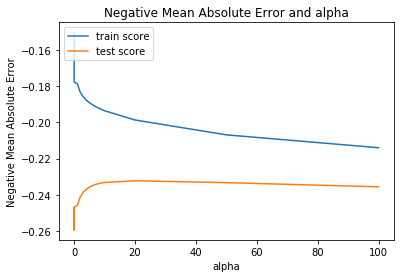

In [3460]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [3461]:
alpha =20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-0.05842328, -0.0241712 ,  0.0376819 , -0.02456609,  0.00875054,
        0.00588583, -0.0107272 , -0.01706897,  0.21489482,  0.1061234 ,
        0.00034446, -0.00726507,  0.01022954, -0.03580088,  0.03343014,
        0.05250529, -0.01039964,  0.0166862 ,  0.01389542,  0.00866602,
       -0.00536116,  0.01513458,  0.0096395 ,  0.03651837,  0.00264601,
        0.08909124,  0.10291343,  0.00771025,  0.15174899,  0.08325834,
        0.01326498,  0.04673542,  0.02198175,  0.02438162, -0.02927015,
       -0.0232374 ,  0.04929126,  0.0157916 ,  0.04835751, -0.03206028,
        0.10886536,  0.01839612, -0.02691063,  0.03160033,  0.00246931,
        0.03142359, -0.00046075,  0.02261405,  0.01827825,  0.02932392,
       -0.04278149, -0.00243252, -0.00430849, -0.00059002, -0.11223382,
       -0.05342376,  0.01513304,  0.0894417 ,  0.04870309,  0.12319379,
       -0.0206435 ,  0.06410183,  0.05865121,  0.09302595,  0.07515255,
       -0.06084614, -0.01232374, -0.0183015 , -0.00890821, -0.03

## Lasso

In [3462]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train) 

Fitting 6 folds for each of 28 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    3.5s finished


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [3463]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.114340,0.040601,0.001833,0.000373,0.0001,{'alpha': 0.0001},-0.334959,-0.279252,-0.231383,-0.280219,-0.201214,-0.210282,-0.256295,0.046695,3,-0.158185,-0.151383,-0.155339,-0.154292,-0.157600,-0.153694,-0.155082,0.002319
1,0.103672,0.007739,0.002167,0.000687,0.001,{'alpha': 0.001},-0.313236,-0.242862,-0.233944,-0.232924,-0.200330,-0.214083,-0.239635,0.035886,1,-0.178713,-0.187505,-0.168743,-0.190812,-0.197268,-0.196241,-0.186547,0.010053
2,0.016001,0.000817,0.001667,0.000471,0.01,{'alpha': 0.01},-0.242842,-0.253944,-0.254179,-0.244348,-0.232884,-0.241719,-0.244984,0.007378,2,-0.234379,-0.229950,-0.209629,-0.227128,-0.237669,-0.231987,-0.228457,0.009045
3,0.013334,0.001886,0.002333,0.000471,0.05,{'alpha': 0.05},-0.250904,-0.272470,-0.285117,-0.265813,-0.281194,-0.269135,-0.270753,0.011112,4,-0.266831,-0.265300,-0.240784,-0.257655,-0.271102,-0.267829,-0.261584,0.010157
4,0.010667,0.000471,0.001167,0.000373,0.1,{'alpha': 0.1},-0.279030,-0.309692,-0.308953,-0.293170,-0.320208,-0.303425,-0.302390,0.013215,5,-0.304984,-0.300288,-0.273445,-0.294868,-0.301840,-0.304779,-0.296700,0.010934


In [3464]:
model_cv.best_params_

{'alpha': 0.001}

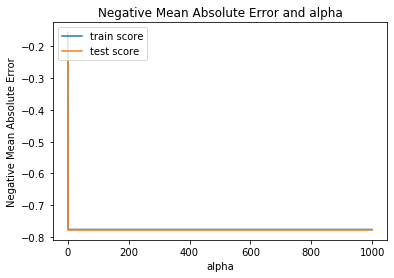

In [3465]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [3466]:
alpha =0.02
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [3467]:
lasso.coef_

array([-0.0514712 ,  0.        ,  0.03028023, -0.01318177, -0.        ,
       -0.        , -0.        , -0.00361995,  0.28958703,  0.08013773,
        0.        , -0.        ,  0.        , -0.        ,  0.01010361,
        0.03952019, -0.        ,  0.00999172,  0.        ,  0.        ,
       -0.        ,  0.03332161,  0.00603948,  0.03840874,  0.        ,
        0.01908744,  0.        , -0.        ,  0.25721044,  0.07385797,
        0.        ,  0.03290611,  0.        ,  0.        , -0.00719048,
       -0.01463723,  0.02349637,  0.02564494,  0.0544693 , -0.01193159,
        0.12292379,  0.01022252,  0.        ,  0.        , -0.        ,
        0.02317838,  0.        ,  0.        ,  0.00046585,  0.01269402,
       -0.01771396, -0.02159014, -0.        , -0.        , -0.1471044 ,
       -0.06731052, -0.        ,  0.        ,  0.        ,  0.00125694,
       -0.05169418,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [3468]:
pd.Series(lasso.coef_,index=X.columns).sort_values(ascending=False)

OverallQual                      0.289587
GrLivArea                        0.257210
GarageCars                       0.122924
OverallCond                      0.080138
BsmtFullBath                     0.073858
FireplaceQu                      0.054469
BsmtExposure                     0.039520
CentralAir                       0.038409
TotalBsmtSF                      0.033322
FullBath                         0.032906
LotArea                          0.030280
Fireplaces                       0.025645
GarageType_Attchd                0.024606
TotRmsAbvGrd                     0.023496
WoodDeckSF                       0.023178
1stFlrSF                         0.019087
ScreenPorch                      0.012694
GarageArea                       0.010223
BsmtCond                         0.010104
BsmtFinSF1                       0.009992
HeatingQC                        0.006039
Condition1_Norm                  0.003650
MSZoning_RL                      0.001257
3SsnPorch                        0

### Top 10 Features after performing Lasso Regression

- OverallQual 
- GrLivArea 
- GarageCars 
- OverallCond 
- Condition1_Norm
- BsmtFullBath 
- FireplaceQu
- GarageType_Attchd
- BsmtExposure 
- FullBath